In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os

In [20]:
def plot_offload_stats(filename = 'offload_stats.csv'):
    fig, (ax1, ax2) = plt.subplots(1,2, tight_layout=True, figsize=(10,5))
    df = pd.read_csv(filename)
    df = df.astype(int)
    df = df.reset_index().drop(columns='index')
    df[['cpu', 'cpu_total', 'cpu_intermediate', 'cpu_output', 'cpu_parameter', 'cpu_optimizer_state']].plot(ax=ax1)
    ax1.set_title('CPU Offload Stats')
    df[['gpu', 'gpu_total', 'gpu_intermediate', 'gpu_output', 'gpu_parameter', 'gpu_optimizer_state']].plot(ax=ax2)
    ax2.set_title('GPU Offload Stats')

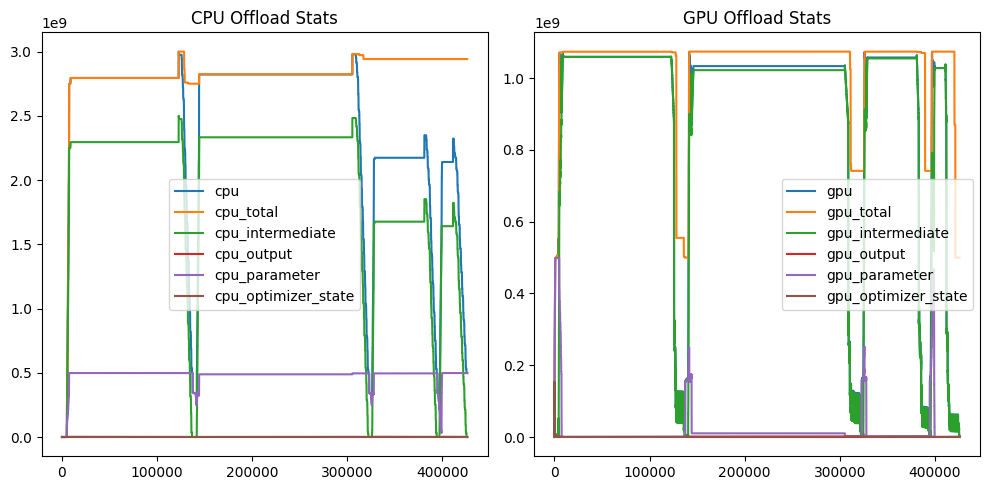

In [21]:
plot_offload_stats()

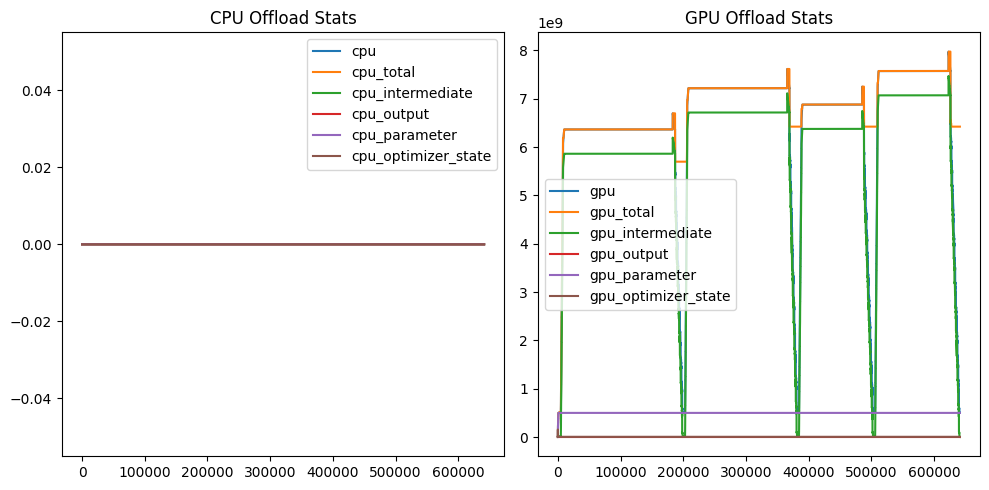

In [22]:
plot_offload_stats("offload-8-2048.csv")

In [4]:

def plot_loss(_gpu_mem, _bs, _linear_decay):
    fig, axes = plt.subplots(2, figsize=(10, 20))

    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
    color_index = 0 
    for i, dir in enumerate(os.listdir('models')):
        model_dir = os.path.join('models', dir)
        if not os.path.isdir(model_dir): continue 
        try:
            try:
                model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem, linear_decay = dir.split('-')
                linear_decay = bool(int(linear_decay))
            except:
                model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem = dir.split('-')
                linear_decay = True 
            if int(gpu_mem) != _gpu_mem: continue
            if int(bs) != _bs: continue
            if linear_decay != _linear_decay: continue
            print(model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem) 
            if not os.path.exists(os.path.join(model_dir, 'log.csv')): continue
            df = pd.read_csv(os.path.join(model_dir, 'log.csv'))
            # print(df.columns)
            df.plot.scatter(x = 'tot_time', y = 'loss', ax = axes[0], label=f'{attn}-{ff}', c=colors[color_index])
            df['loss'].plot(ax = axes[1], label=f'{attn}-{ff}', c=colors[color_index])
            color_index += 1
            color_index = color_index % len(colors)
        except:
            continue 
    plt.legend()

gpt2 124M 4 0.4 0.0 4 1024 2
gpt2 124M 4 0.0 0.4 4 1024 2
gpt2 124M 4 0.8 0.8 4 1024 2
gpt2 124M 4 0.8 0.4 4 1024 2
gpt2 124M 4 0.0 0.8 4 1024 2
gpt2 124M 4 0.4 0.4 4 1024 2
gpt2 124M 4 0.4 0.8 4 1024 2
gpt2 124M 4 0.0 0.0 4 1024 2
gpt2 124M 4 0.8 0.0 4 1024 2


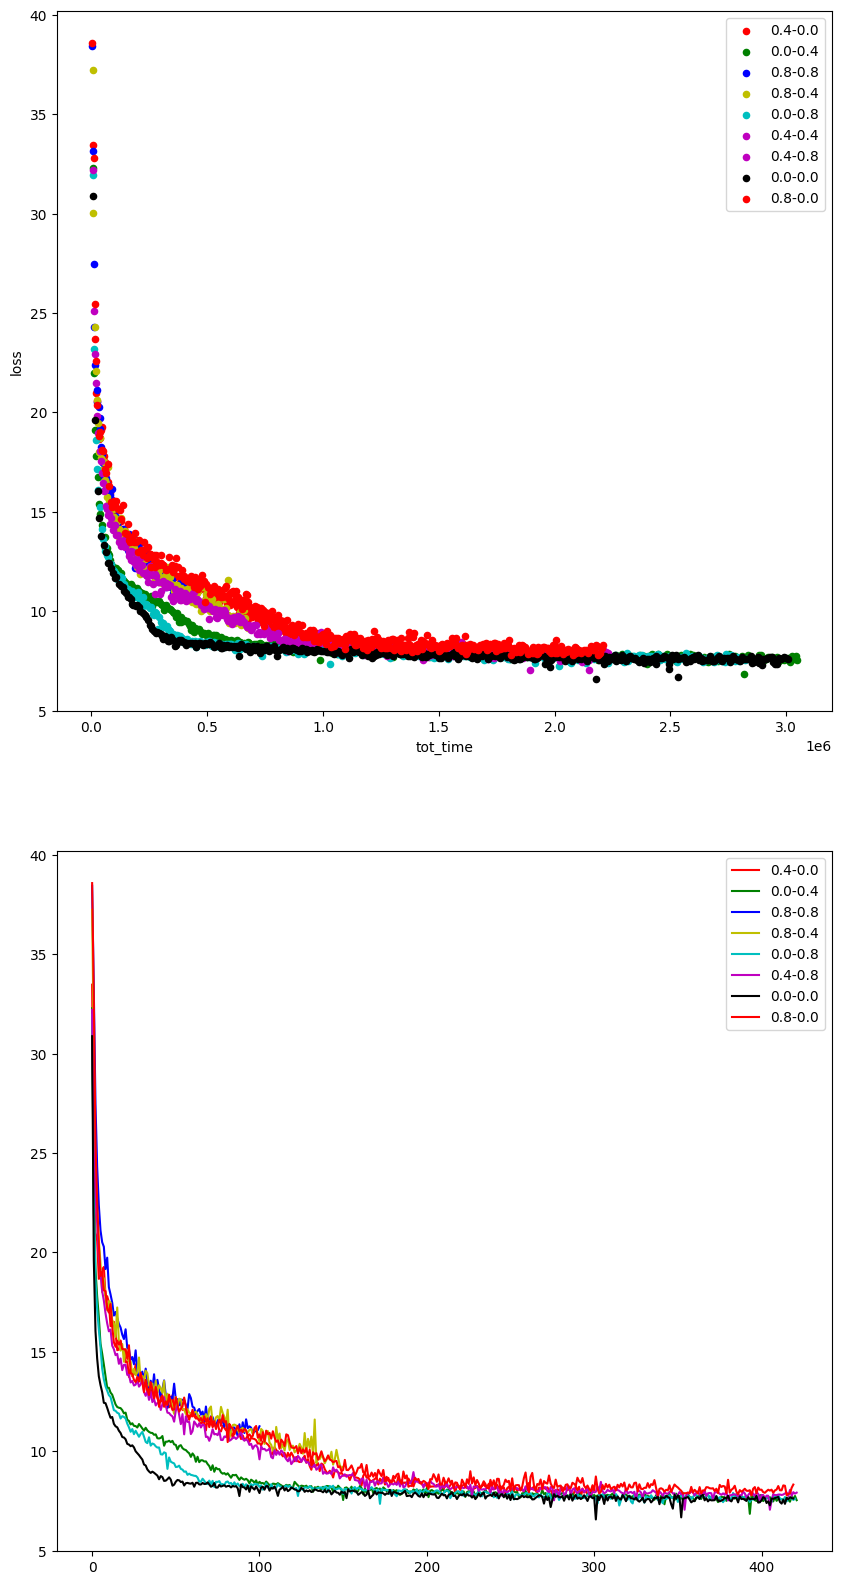

In [5]:
plot_loss(_gpu_mem=2, _bs=1024, _linear_decay=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


gpt2 124M 4 0.4 0.0 4 1024 2
error with gpt2-124M
error with gpt2-124M-0.4
gpt2 124M 4 0.0 0.4 4 1024 2
error with gpt2-355M
gpt2 124M 4 0.8 0.8 4 1024 2
gpt2 124M 4 0.8 0.4 4 1024 2
gpt2 124M 4 0.0 0.8 4 1024 2
gpt2 124M 4 0.4 0.4 4 1024 2
gpt2 124M 4 0.4 0.8 4 1024 2
gpt2 124M 4 0.0 0.0 4 1024 2
gpt2 124M 4 0.8 0.0 4 1024 2
error with iwslt-envi
error with gpt2-124M-0.2
error with gpt2-1558M
error with gpt2-774M


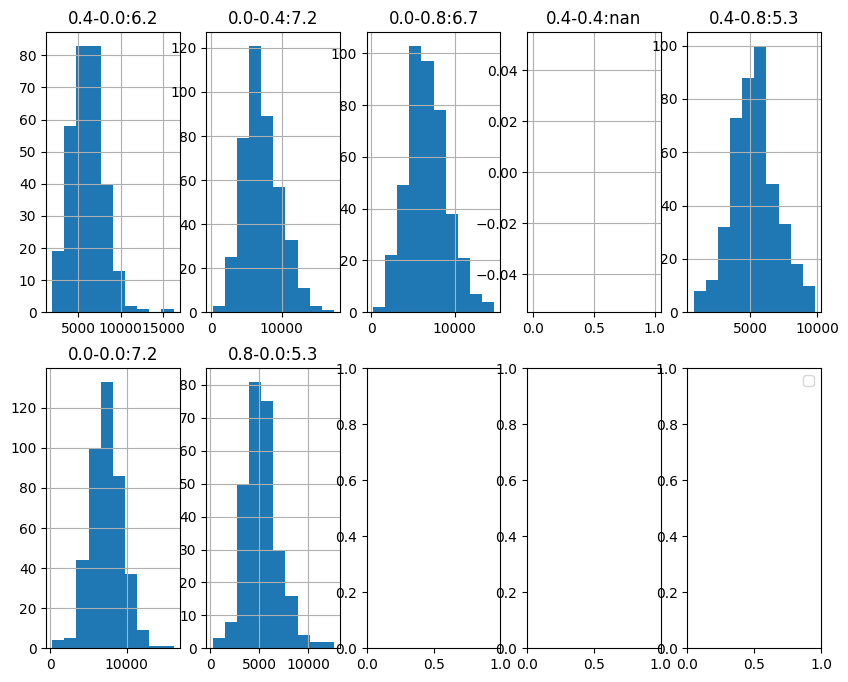

In [32]:
fig, axes = plt.subplots(2, 5, figsize=(10, 8))
index = 0
for i, dir in enumerate(os.listdir('models')):
    model_dir = os.path.join('models', dir)
    if not os.path.isdir(model_dir): continue 
    try: 
        model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem = dir.split('-')
        print(model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem) 
        if not os.path.exists(os.path.join(model_dir, 'log.csv')): continue
        df = pd.read_csv(os.path.join(model_dir, 'log.csv'))
        # print(df.columns)
        df['iter_time'].hist(ax=axes[index//5, index%5])
        mean = round(df['iter_time'].mean()/1000, 1)
        axes[index//5, index%5].set_title(f'{attn}-{ff}:{mean}')
        index += 1 
    except:
        print('error with', dir)
        continue 
plt.legend()

In [38]:
dfs = []
keys = []
for i, dir in enumerate(os.listdir('models')):
    model_dir = os.path.join('models', dir)
    if not os.path.isdir(model_dir): continue 
    try: 
        model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem = dir.split('-')
        print(model_name, model_size, lora_r, attn, ff, uf, bs, gpu_mem) 
        if not os.path.exists(os.path.join(model_dir, 'log.csv')): continue
        df = pd.read_csv(os.path.join(model_dir, 'log.csv'))
        dfs.append(df.mean())
        keys.append(f'{attn}-{ff}')
    except:
        print('error with', dir)
        continue 

gpt2 124M 4 0.4 0.0 4 1024 2
error with gpt2-124M
error with gpt2-124M-0.4
gpt2 124M 4 0.0 0.4 4 1024 2
error with gpt2-355M
gpt2 124M 4 0.8 0.8 4 1024 2
gpt2 124M 4 0.8 0.4 4 1024 2
gpt2 124M 4 0.0 0.8 4 1024 2
gpt2 124M 4 0.4 0.4 4 1024 2
gpt2 124M 4 0.4 0.8 4 1024 2
gpt2 124M 4 0.0 0.0 4 1024 2
gpt2 124M 4 0.8 0.0 4 1024 2
error with iwslt-envi
error with gpt2-124M-0.2
error with gpt2-1558M
error with gpt2-774M


In [48]:
mean_df = pd.concat(dfs, keys=keys, axis=1).drop(columns='0.4-0.4')

In [49]:
mean_df

,0.4-0.0,0.0-0.4,0.0-0.8,0.4-0.8,0.0-0.0,0.8-0.0
tot_time,9.055813e+05,1.433360e+06,1.332740e+06,1.102073e+06,1.518526e+06,9.693644e+05
tot_exec_time,8.468923e+05,1.337399e+06,1.238670e+06,1.016992e+06,1.427351e+06,8.872001e+05
iter_time,6.191843e+03,7.216874e+03,6.710911e+03,5.287530e+03,7.158739e+03,5.324639e+03
iter_exec_time,1.085652e+03,1.236830e+03,1.137847e+03,9.026294e+02,1.257789e+03,9.065795e+02
loss,1.016087e+01,8.596944e+00,8.437852e+00,9.373670e+00,8.184464e+00,1.011751e+01
max_gpu_usage,2.147443e+09,2.147459e+09,2.147446e+09,2.147442e+09,2.147451e+09,2.147420e+09
max_cpu_usage,2.555752e+09,2.897499e+09,2.777192e+09,2.252255e+09,3.041617e+09,1.983565e+09
n_attn,1.993200e+02,2.433270e+02,2.439050e+02,1.948744e+02,2.444857e+02,1.473107e+02
n_ff,2.489200e+02,1.948294e+02,1.462850e+02,1.458531e+02,2.444857e+02,2.464068e+02
n_layer,2.489200e+02,2.433270e+02,2.439050e+02,2.433270e+02,2.444857e+02,2.464068e+02


In [52]:
normalized_df = mean_df.div(mean_df['0.0-0.0'], axis=0)

In [55]:
mean_df

,0.4-0.0,0.0-0.4,0.0-0.8,0.4-0.8,0.0-0.0,0.8-0.0
tot_time,9.055813e+05,1.433360e+06,1.332740e+06,1.102073e+06,1.518526e+06,9.693644e+05
tot_exec_time,8.468923e+05,1.337399e+06,1.238670e+06,1.016992e+06,1.427351e+06,8.872001e+05
iter_time,6.191843e+03,7.216874e+03,6.710911e+03,5.287530e+03,7.158739e+03,5.324639e+03
iter_exec_time,1.085652e+03,1.236830e+03,1.137847e+03,9.026294e+02,1.257789e+03,9.065795e+02
loss,1.016087e+01,8.596944e+00,8.437852e+00,9.373670e+00,8.184464e+00,1.011751e+01
max_gpu_usage,2.147443e+09,2.147459e+09,2.147446e+09,2.147442e+09,2.147451e+09,2.147420e+09
max_cpu_usage,2.555752e+09,2.897499e+09,2.777192e+09,2.252255e+09,3.041617e+09,1.983565e+09
n_attn,1.993200e+02,2.433270e+02,2.439050e+02,1.948744e+02,2.444857e+02,1.473107e+02
n_ff,2.489200e+02,1.948294e+02,1.462850e+02,1.458531e+02,2.444857e+02,2.464068e+02
n_layer,2.489200e+02,2.433270e+02,2.439050e+02,2.433270e+02,2.444857e+02,2.464068e+02


NameError: name 'normalized_df' is not defined

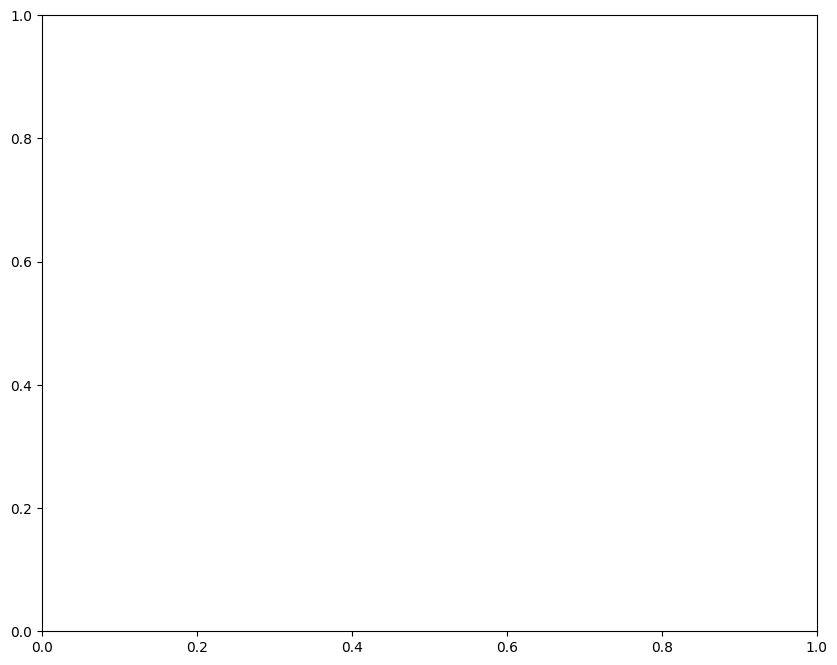

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
normalized_df.plot.bar(ax=ax)